## Linear Regression

A supervised learning technique used for predicting real-valued outputs. For a set of data we are given feature vectors x⁽ⁱ⁾ ∈ R, and corresponding target value y⁽ⁱ⁾ ∈ R. Regression approximates a dataset with a linear function while classification divides a dataset into groups.

## Linear Model Assumption

Linear regression assumes that the target output can be approximated by a linear function of the input:  
ŷ⁽ⁱ⁾ = w₁x⁽ⁱ⁾ + b  

Here, w₁ is the weight and b is the bias. This model is equivalent to a single neuron with a linear activation function.

## Cost Function: Mean Squared Error

To train the model, we minimize the Mean Squared Error (MSE):  
C(w₁, b) = (1 / 2N) ∑ⁿᵢ₌₁ (ŷ⁽ⁱ⁾ − y⁽ⁱ⁾)²  

For a single data point (i.e., N = 1), the cost becomes:  
C(w₁, b) = (1 / 2) (w₁x⁽ⁱ⁾ + b − y⁽ⁱ⁾)²  

## Gradient Descent Optimization

To minimize the cost, we apply gradient descent. The updates for w₁ and b use their partial derivatives:  
∂C / ∂w₁ = (ŷ⁽ⁱ⁾ − y⁽ⁱ⁾)x⁽ⁱ⁾, ∂C / ∂b = (ŷ⁽ⁱ⁾ − y⁽ⁱ⁾)

We only step a small amount along the negative gradient to avoid overshooting, we define this step size as alpha, and it represents the "speed" of our regression model.


In [21]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))



import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Banknotes Dataset

We are using the banknotes dataset, which contains features such as variance, skewness, curtosis, entropy, and class. For this analysis, we focus on the `skewness` and `curtosis` data points, which exhibit a clearly linear relationship. This makes the dataset suitable for linear regression.

/tmp/ipykernel_175938/1141821677.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


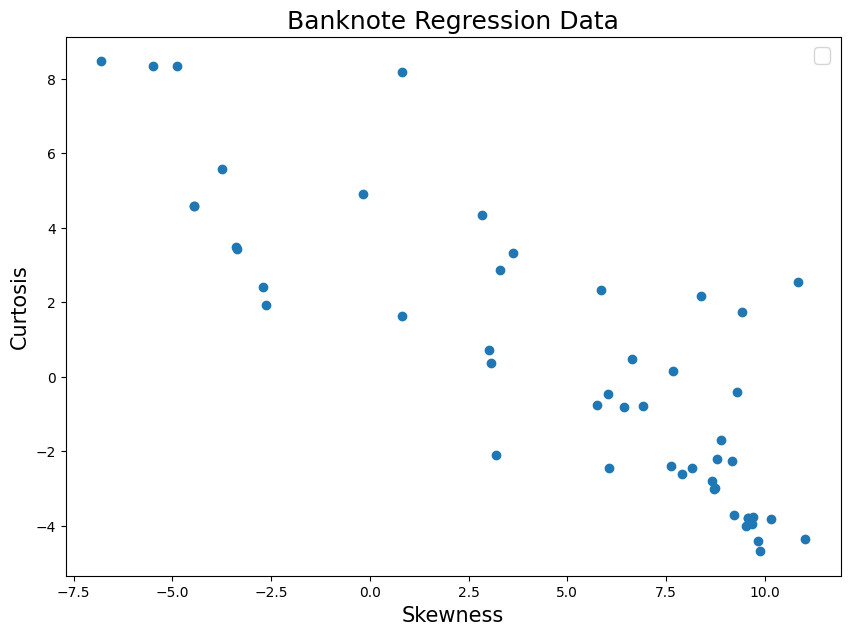

In [22]:

# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class
#D = pd.concat([banknote_df.iloc[:50], banknote_df.iloc[762:812]]) # reduces the data set size to 50 of each
D = banknote_df.iloc[:50]





plt.figure(figsize = (10, 7))
plt.scatter(D.skewness, 
            D.curtosis,)
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Curtosis", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Banknote Regression Data", fontsize = 18)
plt.show()

In [23]:
X = D.skewness.to_numpy()
X = X.reshape(-1, 1)
y = D.curtosis

In [24]:
# defining the activation function
def linear_activation(z):
    return z

node = ml.SingleNeuron(linear_activation, alpha = 0.01, epochs = 25)
node.train(X, y)

## The Fitted Line

Once the single neuron is trained, the resulting line clearly approximates the dataset.

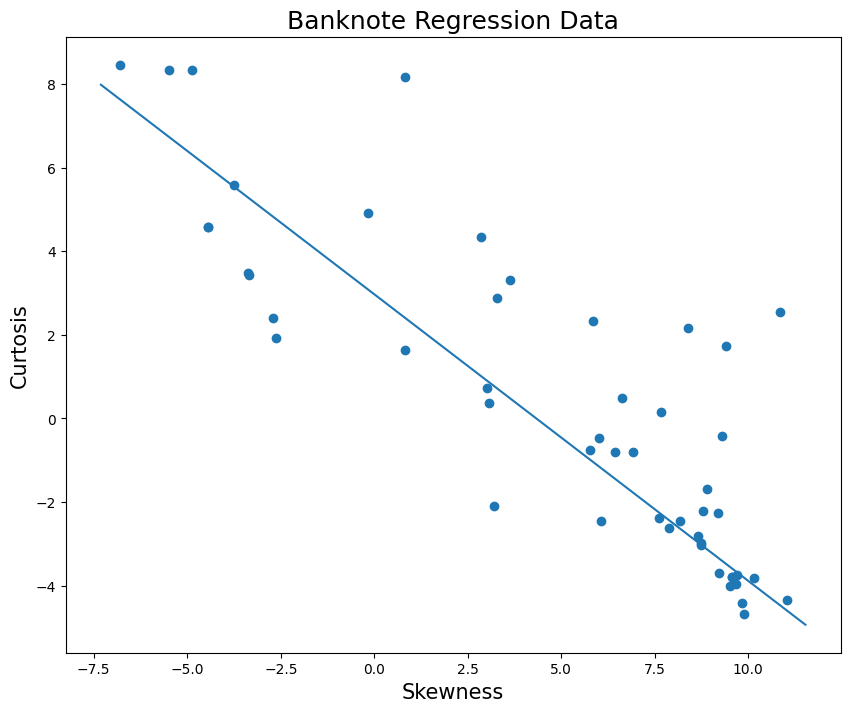

In [25]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Skewness", fontsize = 15)
plt.ylabel("Curtosis", fontsize = 15)
plt.title("Banknote Regression Data", fontsize = 18)
plt.show()

## Error

We can then show how error decreases over the iterations. We are using mean squared error which is the average squared difference between the predicted values and the actual values.

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

The error decrease slows down over time as it approches the optimal fit.

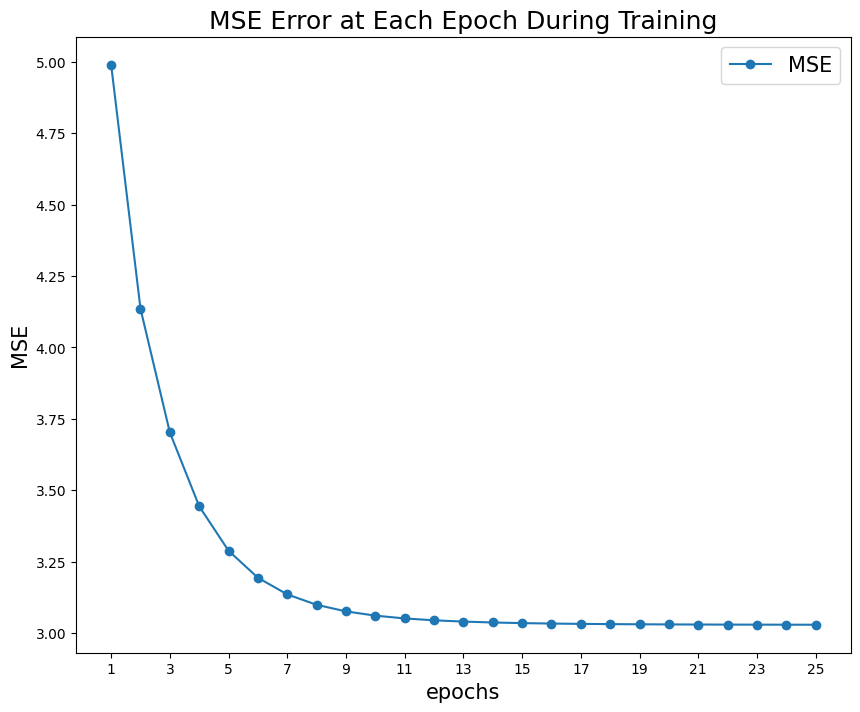

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.xticks(range(1, len(node.errors_) + 1, max(1, len(node.errors_) // 10)))
plt.show()